<a href="https://colab.research.google.com/github/isabellasims/Google-colabs/blob/master/Programming_Languages_Julia_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2020-11-23 02:30:22 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Artifacts ─────── v1.3.0
  Installed VersionParsing ── v1.2.0
  Installed MbedTLS_jll ───── v2.16.8+1
  Installed Parsers ───────── v1.0.12
  Installed SoftGlobalScope ─ v1.1.0
  Installed IJulia ────────── v1.23.0
  Installed JLLWrappers ───── v1.1.3
  Installed ZeroMQ_jll ────── v4.3.2+5
  Installed JSON ──────────── v0.21.1
  Installed MbedTLS ───────── v1.0.3
  Installed Conda ─────────── v1.5.0
  Installed ZMQ ───────────── v1.2.1
######################################################################## 100.

In [17]:
println("Hello")
println("HI");

Hello
HI


In [13]:
import Pkg
Pkg.add("Plots")


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
ERROR: ERROR: LoadError: LoadError: LoadError: fatal: error thrown and no exception handler available.
InterruptException()
fatal: error thrown and no exception handler available.
InterruptException()
jl_mutex_unlock at /buildworker/worker/package_linux64/build/src/locks.h:143 [inlined]
jl_compile_method_internal at /buildworker/worker/package_linux64/build/src/gf.c:1912
_jl_invoke at /buildworker/worker/package_linux64/build/src/gf.c:2154 [inlined]
jl_apply_generic at /buildworker/worker/package_linux64/build/src/gf.c:2323
#showerror#651 at ./errorshow.jl:85
showerror##kw at ./errorshow.jl:84
unknown function (ip: 0x7fd8b410b36b)
_jl_invoke at /buildworker/worker/package_linux64/build/src/gf.c:2159 [inlined]
jl_apply_generic at /

ErrorException: ignored

#invokelatest#1 at ./essentials.jl:712 [inlined]
invokelatest at ./essentials.jl:711 [inlined]
_start at ./client.jl:486
jfptr__start_2075.clone_1 at /usr/local/lib/julia/sys.so (unknown line)
_jl_invoke at /buildworker/worker/package_linux64/build/src/gf.c:2145 [inlined]
jl_apply_generic at /buildworker/worker/package_linux64/build/src/gf.c:2323
jl_apply at /buildworker/worker/package_linux64/build/ui/../src/julia.h:1700 [inlined]
true_main at /buildworker/worker/package_linux64/build/ui/repl.c:96
main at /buildworker/worker/package_linux64/build/ui/repl.c:217
__libc_start_main at /lib/x86_64-linux-gnu/libc.so.6 (unknown line)
_start at /usr/local/bin/julia (unknown line)


In [18]:
using Plots
srand(123)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


UndefVarError: ignored

import Pkg # allow package imports




Pkg.add("your specific package name here" #import package

In [56]:
# allow package imports
import Pkg 


# import packages
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("HTTP")


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


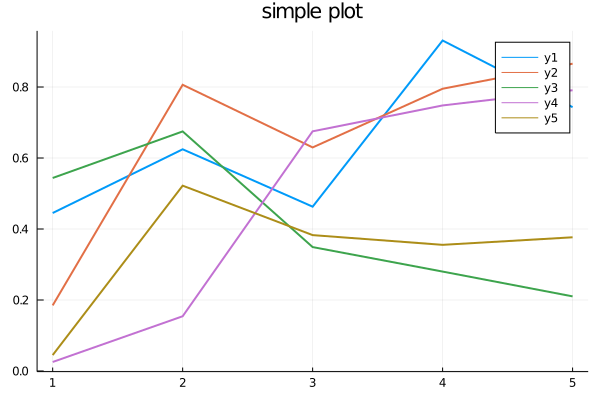

In [25]:
using Plots
plot(rand(5,5),linewidth = 2,title="simple plot")

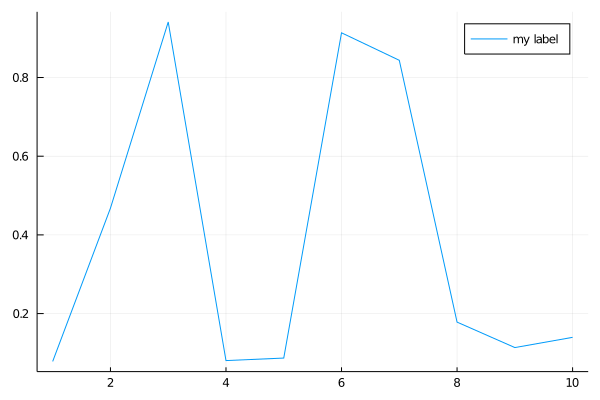

In [28]:
x = 1:10; y = rand(10); # These are the plotting data 
plot(x,y, label="my label")

In [88]:
using HTTP, DataFrames, CSV # load packages

r = HTTP.get("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
d = HTTP.get("https://github.com/nytimes/covid-19-data/blob/master/us-states.csv")
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

using CSV
CSV.read(url)
 



ArgumentError: ignored

In [113]:
using CSV

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
CSV.File(download(url))
d = download("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv","us-states.csv" )
# f = CSV.File(HTTP.get(url).body)






"us-states.csv"

In [114]:
;ls

sample_data
us-states.csv


In [74]:
using CSV   

dataset = CSV.read(download(url,','))

MethodError: ignored